In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

# 最急降下法

In [2]:
# data
df = pd.read_csv('sample_data.csv')
print(df.shape)
df.head(3)

(10, 2)


,space,rent
0,20,13.958824
1,25,11.533805
2,28,14.269547


/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='space', ylabel='rent'>

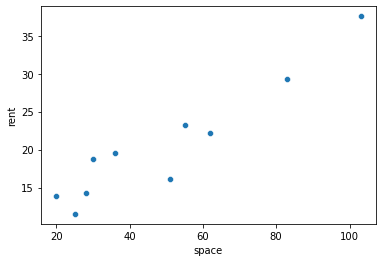

In [3]:
# scatterplot
sns.scatterplot('space', 'rent', data=df)

In [4]:
# 損失関数
def cost_func(theta_0, theta_1, x, y):
    diff_squared = np.square(y - (theta_0 + theta_1*x))
    return np.mean(diff_squared)

# def cost_func(val1, val2, xi, yi):
#     diff_list = []
#     for x, y in zip(xi, yi):
#         diff = (y - (val1 + val2*x))**2
#         diff_list.append(diff)
#     return np.mean(diff_list)

In [5]:
cost = cost_func(10, 0.1, df['space'], df['rent'])
cost

59.21797278616354

## 可視化

In [6]:
from itertools import product

x = df['space']
y = df['rent']
theta_0 = np.linspace(-20, 20, 100)
theta_1 = np.linspace(-1, 1, 100)
cost = [cost_func(*param, x=x, y=y) for param in product(theta_0, theta_1)]
np.array(cost).shape

(10000,)

In [7]:
theta_0_ax, theta_1_ax = np.meshgrid(theta_0, theta_1)
cost = np.array(cost).reshape(theta_1_ax.shape)
print(theta_0_ax.shape, theta_1_ax.shape, cost.shape)

(100, 100) (100, 100) (100, 100)


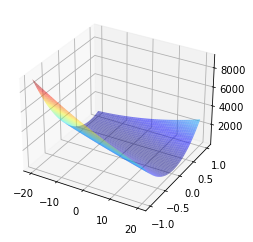

In [8]:
ax = plt.axes(projection='3d')
ax.plot_surface(theta_0_ax.T, theta_1_ax.T, cost, cmap='jet', alpha=0.5)

In [9]:
list(product(theta_0, theta_1))[:5]

[(-20.0, -1.0),
 (-20.0, -0.9797979797979798),
 (-20.0, -0.9595959595959596),
 (-20.0, -0.9393939393939394),
 (-20.0, -0.9191919191919192)]

In [10]:
theta_0_ax

array([[-20.        , -19.5959596 , -19.19191919, ...,  19.19191919,
         19.5959596 ,  20.        ],
       [-20.        , -19.5959596 , -19.19191919, ...,  19.19191919,
         19.5959596 ,  20.        ],
       [-20.        , -19.5959596 , -19.19191919, ...,  19.19191919,
         19.5959596 ,  20.        ],
       ...,
       [-20.        , -19.5959596 , -19.19191919, ...,  19.19191919,
         19.5959596 ,  20.        ],
       [-20.        , -19.5959596 , -19.19191919, ...,  19.19191919,
         19.5959596 ,  20.        ],
       [-20.        , -19.5959596 , -19.19191919, ...,  19.19191919,
         19.5959596 ,  20.        ]])

## パラメータ更新の実装

In [11]:
def update_theta(theta_0, theta_1, alpha, x, y):
    theta_0_updated = theta_0 - (alpha * np.mean((theta_0 + theta_1*x - y))*2)
    theta_1_updated = theta_1 - (alpha * np.mean((theta_0 + theta_1*x - y)*x)*2)
    return theta_0_updated, theta_1_updated

In [12]:
# update_history = []
epochs = 100000
alpha = 5e-5
# loss_min, theta_0_min, theta_1_min = None, None, None
theta_0_int = -5
theta_1_int = -0.5
x = df['space']
y = df['rent']
theta_0_hist = []
theta_1_hist = []
theta_0_hist.append(theta_0_int)
theta_1_hist.append(theta_1_int)

for _ in range(epochs):
    theta_0, theta_1 = update_theta(theta_0_hist[-1], theta_1_hist[-1], alpha, x, y)
    theta_0_hist.append(theta_0)
    theta_1_hist.append(theta_1)

# for _ in range(epochs):
#     loss = cost_func(theta_0, theta_1, x, y)
#     update_history.append({f'theta_0: {theta_0}, theta_1: {theta_1}': loss})
#     theta_0, theta_1 = update_theta(theta_0, theta_1, alpha, x, y)

# print(f'loss_min: {loss_min}, theta_0: {theta_0_min}, theta_1: {theta_1_min}')

In [13]:
print(theta_0_hist[-1])
print(theta_1_hist[-1])

5.692313583745944
0.2972194648547114


In [14]:
hist_set = set(theta_0_hist)
len(hist_set)

100001

## 推移をプロット

In [15]:
cost_hist = [cost_func(*param, x=x, y=y) for param in zip(theta_0_hist, theta_1_hist)]

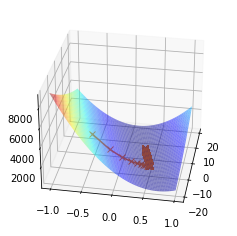

In [16]:
ax = plt.axes(projection='3d')
ax.plot_surface(theta_0_ax.T, theta_1_ax.T, cost, cmap='jet', alpha=0.5)
ax.plot(theta_0_hist, theta_1_hist, cost_hist, 'x-')
plt.gca().invert_xaxis()
ax.view_init(elev=30, azim=10)

Text(0, 0.5, 'theta_0')

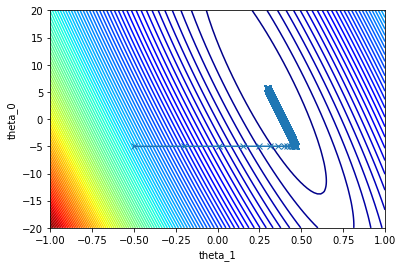

In [17]:
plt.contour(theta_1_ax.T, theta_0_ax.T, cost, levels=100, cmap='jet')
plt.plot(theta_1_hist, theta_0_hist, 'x-')
plt.xlabel('theta_1')
plt.ylabel('theta_0')

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


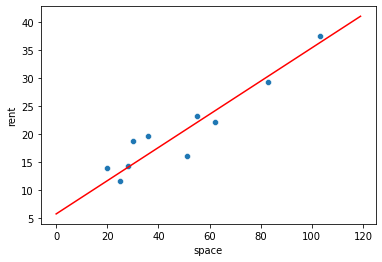

In [18]:
sns.scatterplot('space', 'rent', data=df)
diff_squared = np.square(y - (theta_0 + theta_1*x))

x_value = np.arange(120)
y_value = theta_0_hist[-1] + theta_1_hist[-1]*x_value

plt.plot(x_value, y_value, 'r')

# 正規方程式

In [19]:
# 行列Xを作成
x0 = np.ones((len(df), 1))
x1 = np.array(df['space']).reshape(-1, 1)
X = np.concatenate((x0, x1), axis=1)
X.shape

(10, 2)

In [20]:
y = df['rent'].values.reshape(-1, 1)
y.shape

(10, 1)

In [21]:
best_theta = np.linalg.inv(np.dot(X.T, X)).dot(X.T).dot(y)
best_theta.shape

(2, 1)

In [23]:
best_theta

array([[7.0962325 ],
       [0.27487161]])

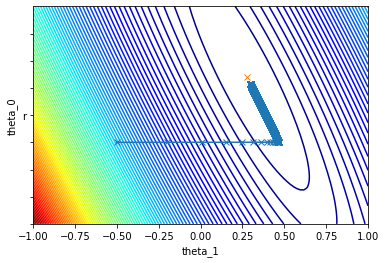

In [24]:
plt.contour(theta_1_ax.T, theta_0_ax.T, cost, levels=100, cmap='jet')
plt.plot(theta_1_hist, theta_0_hist, 'x-')
plt.xlabel('theta_1')
plt.ylabel('theta_0')
plt.plot(best_theta[1], best_theta[0], 'x', 'r')

# 等高線がおかしいので軸の設定をいじる
plt.xlim(-1, 1)
plt.ylim(-20, 20)
plt.yticks(np.arange(-20, 20, 5))
plt.show()

# scikit-learnで線形回帰

In [25]:
from sklearn.linear_model import LinearRegression

In [26]:
model = LinearRegression()

In [36]:
# X は行列の形でなければならない
X = df['space'].values.reshape(-1, 1)
X.shape

(10, 1)

In [35]:
y = df['rent'].values
y.shape

(10,)

In [37]:
model.fit(X, y)

LinearRegression()

In [41]:
model.predict(np.array(27).reshape(-1, 1))

array([14.51776595])

In [42]:
# theta_1
model.coef_

array([0.27487161])

In [43]:
# theta_0
model.intercept_

7.0962324999088295

# 特徴量スケーリング

## 標準化

In [45]:
df = pd.read_csv('sample_data2.csv')
df.head(3)

,space,rent,age
0,20,13.958824,3
1,25,11.533805,13
2,28,14.269547,18


In [48]:
X = df[['space', 'age']]
X.head(3)

,space,age
0,20,3
1,25,13
2,28,18


In [52]:
# 標準化
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [53]:
scaler.fit(X)

StandardScaler()

In [57]:
X_scaled = scaler.transform(X)

In [58]:
pd.DataFrame(X_scaled, columns=X.columns)

,space,age
0,-1.134662,-0.806277
1,-0.941034,0.633504
2,-0.824857,1.353394
3,-0.747405,0.201569
4,-0.515051,-0.374343
5,0.065834,-1.094233
6,0.220736,-0.518321
7,0.491816,-0.950255
8,1.305055,-0.518321
9,2.079569,2.073284


In [63]:
# 線形回帰で学習
from sklearn.linear_model import LinearRegression

y = df['rent']
model = LinearRegression()
model.fit(X_scaled, y)
model.predict([[38, 10]])

array([291.65995715])

## 正規化

In [66]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
X_scaled

array([[0.        , 0.09090909],
       [0.06024096, 0.54545455],
       [0.09638554, 0.77272727],
       [0.12048193, 0.40909091],
       [0.19277108, 0.22727273],
       [0.37349398, 0.        ],
       [0.42168675, 0.18181818],
       [0.5060241 , 0.04545455],
       [0.75903614, 0.18181818],
       [1.        , 1.        ]])

In [67]:
pd.DataFrame(X_scaled, columns=X.columns)

,space,age
0,0.000000,0.090909
1,0.060241,0.545455
2,0.096386,0.772727
3,0.120482,0.409091
4,0.192771,0.227273
5,0.373494,0.000000
6,0.421687,0.181818
7,0.506024,0.045455
8,0.759036,0.181818
9,1.000000,1.000000


# 線形回帰の解釈

In [68]:
# data
df = pd.read_csv('sample_data2.csv')
y_col = 'rent'
X = df.loc[:, df.columns!=y_col]
y = df[y_col]
X.head(3)

,space,age
0,20,3
1,25,13
2,28,18


In [71]:
# 線形回帰
import statsmodels.api as sma

# バイアス項の追加
X = sma.add_constant(X)
X.head(3)

,const,space,age
0,1.0,20,3
1,1.0,25,13
2,1.0,28,18


In [72]:
est = sma.OLS(y, X)
est_trained = est.fit()
est_trained.summary()

/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   rent   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.876
Method:                 Least Squares   F-statistic:                     32.66
Date:                Sun, 04 Sep 2022   Prob (F-statistic):           0.000282
Time:                        05:43:22   Log-Likelihood:                -22.687
No. Observations:                  10   AIC:                             51.37
Df Residuals:                       7   BIC:                             52.28
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.4150      2.043      3.140      0.016       1.584      11.246
space          0.2677      0.035      7.622      0.000       0.185       0.351
age            0.1206      0.131      0.924      0.386      -0.188       0.429
==============================================================================
Omnibus:                        0.981   Durbin-Watson:                   2.514
Prob(Omnibus):                  0.612   Jarque-Bera (JB):                0.734
Skew:                          -0.364   Prob(JB):                        0.693
Kurtosis:                       1.890   Cond. No.                         130.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

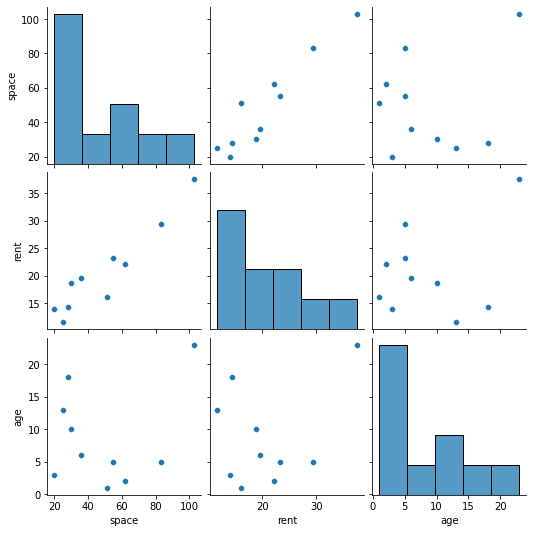

In [73]:
sns.pairplot(df)

In [75]:
# 標準化
from sklearn.preprocessing import StandardScaler

X = df.drop(columns=[y_col])
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = sma.add_constant(X_scaled)
X_scaled

array([[ 1.        , -1.13466215, -0.8062772 ],
       [ 1.        , -0.9410338 ,  0.63350351],
       [ 1.        , -0.82485679,  1.35339387],
       [ 1.        , -0.74740544,  0.2015693 ],
       [ 1.        , -0.51505142, -0.37434298],
       [ 1.        ,  0.06583364, -1.09423334],
       [ 1.        ,  0.22073632, -0.51832106],
       [ 1.        ,  0.49181602, -0.95025527],
       [ 1.        ,  1.3050551 , -0.51832106],
       [ 1.        ,  2.07956852,  2.07328422]])

In [77]:
est = sma.OLS(y, X_scaled)
est_trained = est.fit()
print(est_trained.summary())

                            OLS Regression Results                            
Dep. Variable:                   rent   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.876
Method:                 Least Squares   F-statistic:                     32.66
Date:                Sun, 04 Sep 2022   Prob (F-statistic):           0.000282
Time:                        05:56:27   Log-Likelihood:                -22.687
No. Observations:                  10   AIC:                             51.37
Df Residuals:                       7   BIC:                             52.28
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         20.6474      0.884     23.355      0.0

/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


# ダミー変数

In [78]:
df = pd.read_csv('sample_data3.csv')
df.head(3)

,space,rent,age,facing_direction
0,20,13.958824,3,South
1,25,11.533805,13,South
2,28,14.269547,18,North


In [80]:
df['facing_direction'].drop_duplicates()

0    South
2    North
3     West
6     East
Name: facing_direction, dtype: object

In [85]:
df = pd.get_dummies(df, drop_first=True)
df.head(3)

,space,rent,age,facing_direction_North,facing_direction_South,facing_direction_West
0,20,13.958824,3,0,1,0
1,25,11.533805,13,0,1,0
2,28,14.269547,18,1,0,0


In [86]:
from sklearn.linear_model import LinearRegression

X = df.loc[:, df.columns!=y_col]
y = df[y_col]
model = LinearRegression()
model.fit(X, y)
model.predict([[22, 10, 0, 0, 0]])

/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([15.13887097])

# hold-out

In [20]:
df = sns.load_dataset('tips')
df.head(3)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3


In [21]:
df.shape

(244, 7)

In [22]:
y_col = 'tip'
X = df.drop(y_col, axis=1)
X[:3]

,total_bill,sex,smoker,day,time,size
0,16.99,Female,No,Sun,Dinner,2
1,10.34,Male,No,Sun,Dinner,3
2,21.01,Male,No,Sun,Dinner,3


In [23]:
# 標準化のために数値カラムだけを取得する
numeric_cols = X.select_dtypes(include=np.number)
numeric_cols[:3]

,total_bill,size
0,16.99,2
1,10.34,3
2,21.01,3


In [24]:
X.dtypes

total_bill     float64
sex           category
smoker        category
day           category
time          category
size             int64
dtype: object

In [25]:
# カラムだけ取り出し、リスト化する
numeric_cols = numeric_cols.columns.to_list()
numeric_cols

['total_bill', 'size']

In [29]:
# ダミー変数化
X = pd.get_dummies(X, drop_first=True)
X[:3]

,total_bill,size,sex_Female,smoker_No,day_Fri,day_Sat,day_Sun,time_Dinner
0,16.99,2,1,1,0,0,1,1
1,10.34,3,0,1,0,0,1,1
2,21.01,3,0,1,0,0,1,1


In [28]:
y = df[y_col]
y[:3]

0    1.01
1    1.66
2    3.50
Name: tip, dtype: float64

In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [31]:
X_train.shape

(170, 8)

In [32]:
y_train.shape

(170,)

In [38]:
# 標準化
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
# 数値のカラムに対してのみ標準化させる
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()
X_train_scaled[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test_scaled[numeric_cols] = scaler.transform(X_test[numeric_cols])

In [39]:
X_train_scaled.head(3)

,total_bill,size,sex_Female,smoker_No,day_Fri,day_Sat,day_Sun,time_Dinner
61,-0.682321,-0.616436,0,0,0,1,0,1
146,-0.152575,0.463915,1,1,0,0,0,0
52,1.620922,1.544266,1,1,0,0,1,1


In [40]:
X_test_scaled.head(3)

,total_bill,size,sex_Female,smoker_No,day_Fri,day_Sat,day_Sun,time_Dinner
64,-0.267738,0.463915,0,1,0,1,0,1
63,-0.190963,1.544266,0,0,0,1,0,1
55,-0.059349,-0.616436,0,1,0,0,1,1


In [44]:
# 線形回帰モデルで学習、予測、評価
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model = LinearRegression()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
mse

0.9550808988617148

# LOOCV(Leave-One-Out-Cross-Validation)

In [66]:
from sklearn.model_selection import LeaveOneOut

X = df['total_bill'].values.reshape(-1, 1)
y = df['tip']

In [60]:
loo = LeaveOneOut()

In [51]:
list(loo.split(X))[5]

(array([  0,   1,   2,   3,   4,   6,   7,   8,   9,  10,  11,  12,  13,
         14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
         27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
         40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
         53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
         66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
         79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
         92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
        105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
        118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
        131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
        144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
        157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
        170, 171, 172, 173, 174, 175, 176, 177, 178

In [67]:
model = LinearRegression()
mse_list = []
for train_index, test_index in loo.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # モデル学習
    model.fit(X_train, y_train)
    # テストデータの予測
    y_pred = model.predict(X_test)
    # MSE
    mse = mean_squared_error(y_test, y_pred)
    mse_list.append(mse)

In [70]:
print(np.mean(mse_list))
print(np.std(mse_list))

1.0675673489857436
2.099794455177631


In [80]:
# cross_val_scoreを使用する
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X, y, cv=loo, scoring='neg_mean_squared_error',  n_jobs=-1)

In [82]:
print(-np.mean(scores))
print(np.std(scores))

1.0675673489857436
2.099794455177631
